#### DSO106 - Machine Learning and Modeling
#### Machine Learning
#### Lesson 3 - Decision Trees and Random Forests
#### Lesson 3 Hands On

##### Melissa Gonzalez
##### 4th Oct 2021
---
##### Part I
+ Create a decision tree model of Titanic dataset that predicts survival.
+ Data Wrangling
    + Recode string data
    + Remove missing data
    + Drop any variables that are redundant and will add to multicollinearity
---
##### Setup
+ load libraries
+ load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
Titanic = sns.load_dataset('titanic')
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### Data Wrangling

In [3]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


+ DV - 'survived'
+ IVs
    + pclass
    + sex - recode
    + age
    + DROP sibsp
    + DROP parch
    + DROP fare (similar to pclass)
    + embarked - recode
    + DROP class - (similar to pclass)
    + DROP who - (similar to sex)
    + DROP adult_male - (similar to sex)
    + DROP deck - (similar to pclass)
    + DROP embark_town (similar to embarked)
    + DROP alive - (similar to DV)
    + alone - recode

In [4]:
Titanic.drop(['sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis = 1, inplace = True)
Titanic

,survived,pclass,sex,age,embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


In [5]:
Titanic.dropna(inplace = True)

In [6]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   embarked  712 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 33.4+ KB


In [8]:
Titanic.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [9]:
Titanic.iloc[:,1:] = Titanic.iloc[:,1:].replace({'male':0, 'female':1, 'C':0, 'S':1, 'Q':2})
Titanic

,survived,pclass,sex,age,embarked
0,0,3,0,22.0,1
1,1,1,1,38.0,0
2,1,3,1,26.0,1
3,1,1,1,35.0,1
4,0,3,0,35.0,1
...,...,...,...,...,...
885,0,3,1,39.0,2
886,0,2,0,27.0,1
887,1,1,1,19.0,1
889,1,1,0,26.0,0


##### Make x and y variables

In [11]:
x = Titanic.drop('survived', axis = 1)
y = Titanic['survived']

##### Train/Test Split
+ I am using random_state = 76 in case that is needed
+ 70/30 Train/Test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

##### Decision Tree

In [13]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

##### Assess Model

In [14]:
treePredictions = decisionTree.predict(x_test)

In [15]:
print(confusion_matrix(y_test, treePredictions))

[[113  12]
 [ 32  57]]


In [16]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       125
           1       0.83      0.64      0.72        89

    accuracy                           0.79       214
   macro avg       0.80      0.77      0.78       214
weighted avg       0.80      0.79      0.79       214



+ 113 people who died were correctly predicted to die, while 57 people who lived were correctly predicted to live.
+ There were 12 False negatives and 32 false positives.
+ The model is better at predicting those who will live (at 83%) than those who will die (78%)
+ Overall the model is fairly accurate with an average of 80% accuracy at predicting survival status.
---
##### Part II
+ Create Random Forest Model of same dataset that predicts survival.
+ Interpret confusion matrix and classication report
+ Did the predictive value change from decision tree?
---
##### Setup

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier  # the only unique line from decision tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

+ Same data import, data wrangling, and train/test split as above!
##### Initial Random Forest

In [18]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

In [19]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[113  12]
 [ 27  62]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       125
           1       0.84      0.70      0.76        89

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.81       214
weighted avg       0.82      0.82      0.81       214



+ The random forest was the same at predicting if passengers did not die, but it was slightly better than single tree at predicting if they survived.
+ Both percentages went up, and overall rose 2% to 82% accuracy.

In [20]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result)
    print(n, ':', result)

1 : 0.822429906542056
4 : 0.8130841121495327
5 : 0.8271028037383178
8 : 0.8177570093457944
10 : 0.8130841121495327
20 : 0.8130841121495327
50 : 0.8177570093457944
75 : 0.8177570093457944
100 : 0.8177570093457944
250 : 0.822429906542056
500 : 0.8177570093457944


+ It looks like the number of trees doesn't affect the model too much, with the accuracy wavering between 81 and 83% (at 5 trees)

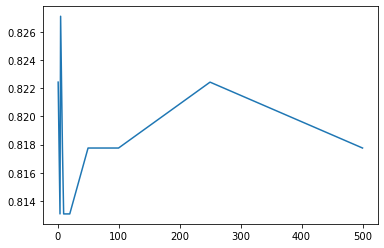

In [21]:
plt.plot(n_estimators_array, results)

In [22]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

pclass      0.155086
sex         0.323907
age         0.478512
embarked    0.042495
dtype: float64

In [23]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

age         0.478512
sex         0.323907
pclass      0.155086
embarked    0.042495
dtype: float64


+ It looks like age and then sex had the greatest influence on if a person survived or not. This makes sense, as very young and very old people would have a harder time keeping afloat in the freezing water for an extended period of time.

In [26]:
Titanic.groupby('sex')['survived'].value_counts()

sex  survived
0    0           360
     1            93
1    1           195
     0            64
Name: survived, dtype: int64

+ It looks like females had the advantage in this situation. This is likely because women would have been given priority in the life boats, as called for by tradition in 1912.